<a href="https://colab.research.google.com/github/Gennadiy-Korobeynikov/Yen-s-algorithm/blob/main/Yen's_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Создание графа**

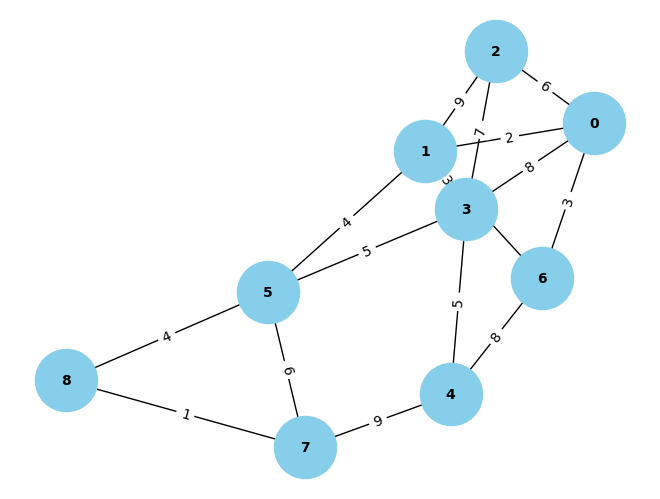

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(['0','1','2','3','4','5','6','7','8'])
G.add_weighted_edges_from([

('0','1',2),
('0','2',6),
('0','3',8),
('0','6',3),

('1','2',9),
('1','3',3),
('1','5',4),
('1','6',9),

('2','3',7),

('3','4',5),
('3','5',5),

('4','6',8),
('4','7',9),

('5','7',6),
('5','8',4),

('7','8',1),
])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.axis('off')
plt.show()

# **Алгоритм Йена**

In [ ]:
def yen_algorithm(graph, source, target, K):
    G =  graph.copy()
    A = {}
    # Поиск первого наикротчайшего пути
    first_path = tuple(nx.shortest_path(G, source, target, weight='weight'))
    A[first_path] = nx.path_weight(G,first_path,'weight')

    Candidates = []


    for k in range(1, K):
        A_short_paths = list(list(p) for p in A.keys())
        G =  graph.copy()

        for i in range(len(A_short_paths[-1]) - 1):
            spur_node = A_short_paths[-1][i]
            root_path = list(A_short_paths[-1][:i+1])

            # Удаление ребёр
            removed_edges = set()

            for path in A_short_paths:
                if len(path)-1 > i and root_path == path[:i+1] :
                  removed_edges.add((path[i],path[i + 1]))
            G.remove_edges_from(removed_edges)


            # Удаление пройденных вершин
            G_temp = G.copy()
            G_temp.remove_nodes_from(root_path[:-1])


            # Поиск очередного пути-кандидата
            no_way = False
            try:
                spur_path = nx.shortest_path(G_temp, spur_node, target, weight='weight')
            except nx.NetworkXNoPath:
                no_way = True

            if not no_way:
              total_path = root_path[:-1] + spur_path
              # Добавление кондидата
              if total_path not in [a[0] for a in Candidates]:
                 Candidates.append( (total_path , nx.path_weight(G,total_path,'weight') ) )


            # Возвращение удалённых рёбер
            for u,v in removed_edges:
              G.add_edge(u,v,weight=graph[u][v]["weight"])

        # Выбор очередного кратчайшего пути среди кандидатов
        if Candidates:
            Candidates = sorted(Candidates, key=lambda x: x[1])
            A[tuple(Candidates[0][0])] = Candidates[0][1]
            Candidates = Candidates[1:] #Удалить добавленный путь

        else:
            break # Заверешние программы, если кандидатов не осталось
    return A

# **Запуск программы**

In [ ]:
k_shortest_paths = yen_algorithm(G, '0', '7', 10)
for i, (path, length) in enumerate(k_shortest_paths.items(), 1):
    print(f"{i}. Путь: {path}, Длина: {length}")

1. Путь: ('0', '1', '5', '8', '7'), Длина: 11
2. Путь: ('0', '1', '5', '7'), Длина: 12
3. Путь: ('0', '1', '3', '5', '8', '7'), Длина: 15
4. Путь: ('0', '1', '3', '5', '7'), Длина: 16
5. Путь: ('0', '3', '5', '8', '7'), Длина: 18
6. Путь: ('0', '1', '3', '4', '7'), Длина: 19
7. Путь: ('0', '3', '5', '7'), Длина: 19
8. Путь: ('0', '6', '4', '7'), Длина: 20
9. Путь: ('0', '3', '1', '5', '8', '7'), Длина: 20
10. Путь: ('0', '6', '1', '5', '8', '7'), Длина: 21
